In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import TfidfVectorizer # tfidf
from sklearn.metrics.pairwise import linear_kernel # 코사인 유사도
from konlpy.tag import Okt # 토큰화
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from soynlp.normalizer import emoticon_normalize, repeat_normalize
import json
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import optimizers
import keras.utils
import sklearn.metrics as metrics

C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:544: FutureWarning: Passing (type, 1) or '1ty

In [2]:
data = pd.read_csv("data/train.hate.csv")
data

,comments,label
0,(현재 호텔주인 심정) 아18 난 마른하늘에 날벼락맞고 호텔망하게생겼는데 누군 계속...,hate
1,....한국적인 미인의 대표적인 분...너무나 곱고아름다운모습...그모습뒤의 슬픔을...,none
2,"...못된 넘들...남의 고통을 즐겼던 넘들..이젠 마땅한 처벌을 받아야지..,그래...",hate
3,"1,2화 어설펐는데 3,4화 지나서부터는 갈수록 너무 재밌던데",none
4,1. 사람 얼굴 손톱으로 긁은것은 인격살해이고2. 동영상이 몰카냐? 메걸리안들 생각...,hate
...,...,...
7891,힘내세요~ 응원합니다!!,none
7892,힘내세요~~삼가 고인의 명복을 빕니다..,none
7893,힘내세용 ^^ 항상 응원합니닷 ^^ !,none
7894,힘내소...연기로 답해요.나도 53살 인데 이런일 저런일 다 있더라구요.인격을 믿습...,none


In [5]:
okt=Okt()

In [6]:
df = pd.read_csv("stop_words.csv",header=None,encoding='cp949')
stopwords = df[1].tolist()

In [7]:
token=[]
for i in data['comments']:
    hangul=re.compile('[^ ㄱ-ㅣ가-힣]+')
    i = hangul.sub('', i) 
    i=repeat_normalize(i,num_repeats=1) # 반복되는 문자 정제
    temp = okt.morphs(i,stem=True)
    temp= [word for word in temp if not word in stopwords]
    token.append(temp)


In [8]:
# word2index={} # {정부:1, 단어:index번호}
# bow=[] # [1, 단어빈도수, 단어빈도수, ... ]
# for i in token:
#     for v in i:
#         if v not in word2index.keys():
#             word2index[v]=len(word2index) # word2index의 크기로 넘버링을 하면 좋겠네.
#             bow.insert(len(word2index)-1,1) # bow의 len(word2index)-1 위치에 1을 넣어라.
#         else:
#             idx = word2index.get(v)
#             bow[idx]=bow[idx]+1
# print(word2index)
# print(bow)

In [9]:
token

[['현재',
  '호텔',
  '주인',
  '심정',
  '난',
  '마른하늘',
  '날벼락',
  '맞다',
  '호텔',
  '망하다',
  '생기다',
  '누',
  '군',
  '계속',
  '추모',
  '받다'],
 ['한국',
  '인',
  '미인',
  '대표',
  '인',
  '분',
  '너무나',
  '곱',
  '고',
  '아름답다',
  '모습',
  '모습',
  '뒤',
  '슬픔',
  '미처',
  '알다',
  '하다',
  'ㅠ'],
 ['못',
  '되다',
  '넘다',
  '들다',
  '남',
  '고통',
  '즐기다',
  '넘다',
  '들이다',
  '젠',
  '마땅하다',
  '처벌',
  '받다',
  '래야',
  '공정하다',
  '심다',
  '거두다'],
 ['화', '어설프다', '화', '지나다', '갈수록', '너무', '재밌다'],
 ['얼굴', '손톱', '긁다', '인격', '살해', '이고', '동영상', '몰카', '냐', '메걸', '리안', '없다'],
 ['진짜', '이승기', '랑', '비교', '되다'],
 ['년안',
  '남녀',
  '간',
  '성',
  '전쟁',
  '한번',
  '크게',
  '치룬',
  '후',
  '일부다처제',
  '여성',
  '정치',
  '참여',
  '금지',
  '여성',
  '투표',
  '권',
  '삭제',
  '세계',
  '공통',
  '문화',
  '자리',
  '잡다',
  '암탉',
  '너무',
  '울다',
  '댐'],
 ['년뒤', '윤서인', '은', '분명하다', '재', '평가', '되다', '임', '말다', '틀리다', '없다'],
 ['만에', '재미', '느끼다', '프로', '이다', '니', '폐지', '하다', '되다'],
 ['년차',
  '방탄',
  '팬',
  '인데',
  '방탄',
  '처럼',
  '성공',
  '은',
  '못',
  '하다',
  '방탄',
  '부

In [10]:
token = pd.Series(token)

In [11]:
data['token'] = token

In [12]:
data['label'].value_counts()

none         3486
offensive    2499
hate         1911
Name: label, dtype: int64

In [13]:
df = data[['label','token']]

In [75]:
train, test = train_test_split(df, test_size=0.3)

In [76]:
print(train.shape)
print(test.shape)

(5527, 2)
(2369, 2)


In [77]:
xTrain = train['token'].tolist()
xTest = test['token'].tolist()

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(xTrain)

In [79]:
print(tokenizer.word_index)

{'하다': 1, '도': 2, '은': 3, '보다': 4, '는': 5, '아니다': 6, '없다': 7, '다': 8, '좋다': 9, '되다': 10, 'ㅋ': 11, '못': 12, '나오다': 13, '이다': 14, '만': 15, '진짜': 16, '너무': 17, 'ㅋㅋ': 18, '그렇다': 19, '고': 20, '남자': 21, '하고': 22, '들다': 23, '이쁘다': 24, '많다': 25, '않다': 26, '가다': 27, '뭐': 28, 'ㅋㅋㅋ': 29, '애': 30, '게': 31, '알다': 32, '그냥': 33, '니': 34, '거': 35, '결혼': 36, '인': 37, '먹다': 38, '연기': 39, '얼굴': 40, '라': 41, '인데': 42, '자다': 43, '면': 44, '돈': 45, '드라마': 46, '랑': 47, '모르다': 48, '한테': 49, '기사': 50, '냐': 51, '차다': 52, '받다': 53, '넘다': 54, '오다': 55, '요': 56, '이나': 57, '살다': 58, '지다': 59, '예쁘다': 60, '연예인': 61, '이제': 62, '보고': 63, '생기다': 64, '치다': 65, '방송': 66, '댓글': 67, '서': 68, '나다': 69, '정말': 70, '난': 71, '맞다': 72, '안되다': 73, 'ㅠㅠ': 74, '근데': 75, '나이': 76, 'ㅠ': 77, '해주다': 78, '보이다': 79, '응원': 80, '이네': 81, '싫다': 82, '님': 83, '욕': 84, '많이': 85, '돼다': 86, '임': 87, '이렇다': 88, '싶다': 89, '배우': 90, '한국': 91, '놈': 92, '해': 93, '기': 94, '이랑': 95, '끄다': 96, '인생': 97, '보기': 98, '남': 99, '처럼': 100, '분': 101, '역시': 102, '얘

In [80]:
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)


단어 집합(vocabulary)의 크기 : 9885
등장 빈도가 1번 이하인 희귀 단어의 수: 5080
단어 집합에서 희귀 단어의 비율: 51.39099645928174
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.26231214624943


In [81]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 4807


In [82]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(xTrain)
xTrain = tokenizer.texts_to_sequences(xTrain)
xTest = tokenizer.texts_to_sequences(xTest)

In [83]:
xTrain = np.array(xTrain)

In [84]:
xTest = np.array(xTest)

In [85]:
xTrain.shape

(5527,)

In [86]:
xTest.shape

(2369,)

In [87]:
yTrain = np.array(train['label'])
yTest = np.array(test['label'])

In [88]:
yTrain.shape

(5527,)

In [89]:
yTest.shape

(2369,)

리뷰의 최대 길이 : 45
리뷰의 평균 길이 : 11.12429889632712


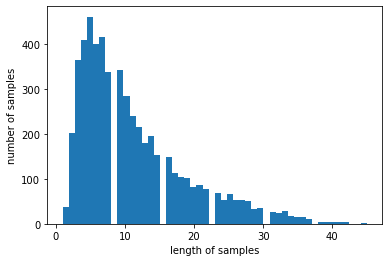

In [90]:
print('리뷰의 최대 길이 :',max(len(l) for l in xTrain))
print('리뷰의 평균 길이 :',sum(map(len, xTrain))/len(xTrain))
plt.hist([len(s) for s in xTrain], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [91]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [92]:
max_len = 35
below_threshold_len(max_len, xTrain)

전체 샘플 중 길이가 35 이하인 샘플의 비율: 99.20390808757011


In [93]:
xTrain = pad_sequences(xTrain, maxlen = max_len)
xTest = pad_sequences(xTest, maxlen = max_len)

In [94]:
print(len(xTrain))
print(len(yTrain))

5527
5527


In [95]:
xTrain

array([[   0,    0,    0, ...,  521,  522,   26],
       [   0,    0,    0, ..., 1622,    3,  213],
       [   0,    0,    0, ...,    1,    2,    1],
       ...,
       [   0,    0,    0, ..., 3192,    2,    7],
       [   0,    0,    0, ...,    1, 2332,   12],
       [   0,    0,    0, ...,  232, 1630,  178]])

In [96]:
def vs(seq,dimension=5527):
    res = np.zeros((len(seq),dimension)) 
    for i,sequence in enumerate(seq):
        res[i, sequence] = 1
                 
    return res

xTrain = vs(xTrain)
xTest = vs(xTest)

In [99]:
for i in range(len(yTrain)):
    if yTrain[i] == 'offensive':
        yTrain[i] = float(1)
      
    elif yTrain[i] == 'hate':
        yTrain[i] = float(2)
  
    elif yTrain[i] == 'none':
        yTrain[i] = float(0)
      
    else:
        pass
  

In [100]:
for i in range(len(yTest)):
    if yTest[i] == 'hate':
        yTest[i] = float(2)
      
    elif yTest[i] == 'offensive':
        yTest[i] = float(1)
      
    elif yTest[i] == 'none':
        yTest[i] = float(0)
      
    else:
        pass


In [101]:
yTrain = yTrain.astype(float)
yTrain

array([1., 1., 2., ..., 1., 2., 0.])

In [102]:
yTrain = keras.utils.to_categorical(yTrain, 3)
yTest = keras.utils.to_categorical(yTest, 3)

In [103]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [104]:
# LSTM 포함 # epochs = 3 / 정확도: 0.4512
model = Sequential()
model.add(Embedding(len(xTrain),max_len))
model.add(LSTM(32))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 35)          193445    
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8704      
_________________________________________________________________
dense_6 (Dense)              (None, 128)               4224      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 387       
Total params: 206,760
Trainable params: 206,760
Non-trainable params: 0
_________________________________________________________________


In [105]:
# Dense만 # 정확도: 0.5479
model = Sequential()
model.add(Dense(256,input_dim = len(xTrain),activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               1415168   
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 195       
Total params: 1,456,515
Trainable params: 1,456,515
Non-trainable params: 0
_________________________________________________________________


In [106]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
adam = optimizers.Adam(lr = 0.00001)
sgd = optimizers.SGD(lr=0.1,decay=1e-6,momentum=0.9, nesterov = True)

In [107]:
model.compile(loss='categorical_crossentropy', metrics=['acc'], optimizer = adam)
history = model.fit(xTrain, yTrain, epochs=10000, callbacks=[es, mc], batch_size=128, validation_split=0.2)

Epoch 1/10000
35/35 [==============================] - ETA: 0s - loss: 1.1032 - acc: 0.2515
Epoch 00001: val_acc improved from -inf to 0.27125, saving model to best_model.h5
35/35 [==============================] - 1s 17ms/step - loss: 1.1032 - acc: 0.2515 - val_loss: 1.1020 - val_acc: 0.2712
Epoch 2/10000
31/35 [=========================>....] - ETA: 0s - loss: 1.1004 - acc: 0.2722
Epoch 00002: val_acc improved from 0.27125 to 0.28662, saving model to best_model.h5
35/35 [==============================] - 0s 12ms/step - loss: 1.1003 - acc: 0.2744 - val_loss: 1.1003 - val_acc: 0.2866
Epoch 3/10000
31/35 [=========================>....] - ETA: 0s - loss: 1.0976 - acc: 0.3185
Epoch 00003: val_acc improved from 0.28662 to 0.33002, saving model to best_model.h5
35/35 [==============================] - 0s 11ms/step - loss: 1.0976 - acc: 0.3192 - val_loss: 1.0987 - val_acc: 0.3300
Epoch 4/10000
31/35 [=========================>....] - ETA: 0s - loss: 1.0950 - acc: 0.3866
Epoch 00004: val_acc

Epoch 31/10000
35/35 [==============================] - ETA: 0s - loss: 1.0004 - acc: 0.4626
Epoch 00031: val_acc did not improve from 0.44033
35/35 [==============================] - 0s 11ms/step - loss: 1.0004 - acc: 0.4626 - val_loss: 1.0478 - val_acc: 0.4349
Epoch 32/10000
30/35 [========================>.....] - ETA: 0s - loss: 0.9954 - acc: 0.4688
Epoch 00032: val_acc did not improve from 0.44033
35/35 [==============================] - 0s 10ms/step - loss: 0.9947 - acc: 0.4682 - val_loss: 1.0449 - val_acc: 0.4358
Epoch 33/10000
31/35 [=========================>....] - ETA: 0s - loss: 0.9882 - acc: 0.4791
Epoch 00033: val_acc did not improve from 0.44033
35/35 [==============================] - 0s 10ms/step - loss: 0.9887 - acc: 0.4768 - val_loss: 1.0419 - val_acc: 0.4394
Epoch 34/10000
30/35 [========================>.....] - ETA: 0s - loss: 0.9807 - acc: 0.4867
Epoch 00034: val_acc improved from 0.44033 to 0.44213, saving model to best_model.h5
35/35 [==========================

Epoch 59/10000
34/35 [============================>.] - ETA: 0s - loss: 0.7344 - acc: 0.7688
Epoch 00059: val_acc improved from 0.54973 to 0.55425, saving model to best_model.h5
35/35 [==============================] - 0s 12ms/step - loss: 0.7349 - acc: 0.7677 - val_loss: 0.9302 - val_acc: 0.5542
Epoch 60/10000
34/35 [============================>.] - ETA: 0s - loss: 0.7224 - acc: 0.7767
Epoch 00060: val_acc improved from 0.55425 to 0.55877, saving model to best_model.h5
35/35 [==============================] - 0s 12ms/step - loss: 0.7230 - acc: 0.7756 - val_loss: 0.9263 - val_acc: 0.5588
Epoch 61/10000
34/35 [============================>.] - ETA: 0s - loss: 0.7116 - acc: 0.7787
Epoch 00061: val_acc improved from 0.55877 to 0.56058, saving model to best_model.h5
35/35 [==============================] - 0s 10ms/step - loss: 0.7110 - acc: 0.7795 - val_loss: 0.9225 - val_acc: 0.5606
Epoch 62/10000
35/35 [==============================] - ETA: 0s - loss: 0.6991 - acc: 0.7903
Epoch 00062: 

34/35 [============================>.] - ETA: 0s - loss: 0.4269 - acc: 0.9000
Epoch 00088: val_acc improved from 0.58499 to 0.58590, saving model to best_model.h5
35/35 [==============================] - 0s 10ms/step - loss: 0.4262 - acc: 0.9009 - val_loss: 0.8887 - val_acc: 0.5859
Epoch 89/10000
35/35 [==============================] - ETA: 0s - loss: 0.4176 - acc: 0.9034
Epoch 00089: val_acc improved from 0.58590 to 0.58770, saving model to best_model.h5
35/35 [==============================] - 0s 10ms/step - loss: 0.4176 - acc: 0.9034 - val_loss: 0.8897 - val_acc: 0.5877
Epoch 90/10000
34/35 [============================>.] - ETA: 0s - loss: 0.4093 - acc: 0.9053
Epoch 00090: val_acc did not improve from 0.58770
35/35 [==============================] - 0s 9ms/step - loss: 0.4094 - acc: 0.9055 - val_loss: 0.8912 - val_acc: 0.5859
Epoch 91/10000
32/35 [==========================>...] - ETA: 0s - loss: 0.4007 - acc: 0.9080
Epoch 00091: val_acc improved from 0.58770 to 0.58861, saving mo

In [108]:
loaded_model = load_model('best_model.h5')
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(xTest, yTest)[1]))

75/75 [==============================] - 0s 2ms/step - loss: 0.9058 - acc: 0.5665

 테스트 정확도: 0.5665


In [109]:
pred = loaded_model.predict(xTest)
pred

array([[0.57210845, 0.16631532, 0.2615762 ],
       [0.8526512 , 0.09594599, 0.05140287],
       [0.07446663, 0.25388828, 0.6716451 ],
       ...,
       [0.27726325, 0.58635134, 0.13638537],
       [0.37740377, 0.42002368, 0.20257251],
       [0.7975001 , 0.12439886, 0.07810105]], dtype=float32)

In [110]:
yTest_decode = []
for i in range(len(pred)):
    val = yTest[i].argmax()
    yTest_decode.append(val)
len(yTest_decode)

2369

In [111]:
pred_decode = []
for i in range(len(yTest)):
    val = pred[i].argmax()
    pred_decode.append(val)
len(pred_decode)

2369

In [112]:
print('f1 : ',metrics.f1_score(yTest_decode, pred_decode, average='macro'))
print('accuracy', metrics.accuracy_score(yTest_decode, pred_decode))

f1 :  0.5276427213941407
accuracy 0.5664837484170536
